<h1><center>LINEAR REGRESSION</center></h1>

## 1. Importando las librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D

## 2. Analyzing Training Data

### Loading Training data

The data corresponds to house sales in Ames, Iowa. All data was collected from: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview 

In [4]:
# We indicate the file location
file_name_train = 'Data/train.csv'
file_name_test = 'Data/test.csv'
train_data = pd.read_csv(file_name_train)
test_data = pd.read_csv(file_name_test)

# We visualize first 100 training data samples (houses)
train_data.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
96,97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


We want to see the model in two dimensions. Thus, we are going to consider ONLY ONE feature (the area of the first floor) and the response variable (the price of the house)

In [7]:
# We load training data
x_train_pd = train_data['1stFlrSF']
y_train_pd = train_data['SalePrice']

x_train_list = x_train_pd.values.tolist()
y_train_list = y_train_pd.values.tolist()

x_train = np.array(x_train_list, dtype='float64')
x_train = x_train.reshape(x_train.shape[0], 1)

y_train = np.array(y_train_list, dtype='float64')
y_train = y_train.reshape(y_train.shape[0], 1)

# We load validation data
x_test_pd = test_data['1stFlrSF']
x_test_list = x_test_pd.values.tolist()
x_test = np.array(x_test_list, dtype='float64')
x_test = x_test.reshape(x_test.shape[0], 1)

print(x_train.shape, y_train.shape, x_test.shape)

(1460, 1) (1460, 1) (1459, 1)


### Visualizing training data

We plot the data:

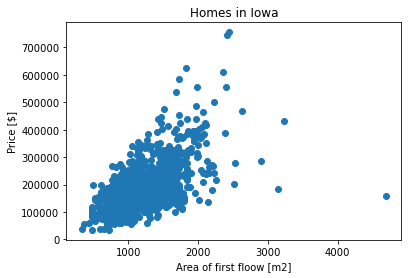

In [8]:
plt.figure()
plt.scatter(x_train, y_train, alpha = 1)
plt.title('Homes in Iowa')
plt.xlabel('Area of first floow [m2]')
plt.ylabel('Price [$]')
plt.show()

Ahora se quiere tener otra variable más: la superficie habitacional del segundo piso

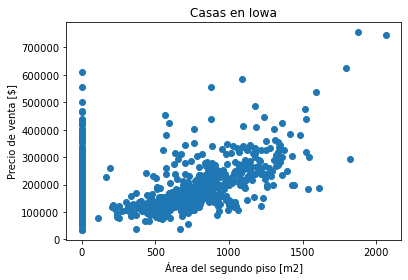

In [5]:
x_train_pd_2 = train_data['2ndFlrSF']
x_train_list_2 = x_train_pd_2.values.tolist()
x_train_2 = np.array(x_train_list_2, dtype='float64').reshape(x_train.shape[0], 1)

# Graficamos los datos 
plt.figure()
plt.scatter(x_train_2, y_train, alpha = 1)
plt.title('Casas en Iowa')
plt.xlabel('Área del segundo piso [m2]')
plt.ylabel('Precio de venta [$]')
plt.show()

Graficamos en 3D los datos

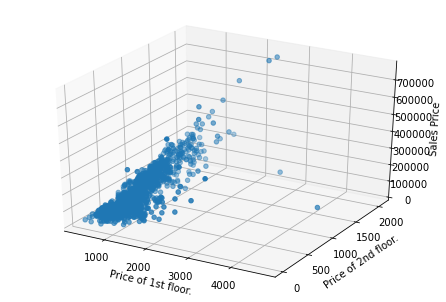

In [6]:
# Plot the surface.
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_train, x_train_2, y_train)

# Set labels
ax.set_xlabel('Price of 1st floor.')
ax.set_ylabel('Price of 2nd floor.')
ax.set_zlabel('Sales Price')
plt.show()

## 2. Creando la hipótesis, la función de costo y el descenso por gradiente

### Creando la hipótesis

Se establece la hipótesis para una sola variable (los datos de superficie del primer piso) como: 

$$h(x)=w^{T}x$$

In [10]:
# Función de la hipótesis
def h(w, x):
    """
        params:
            w: [np_array] a vector of weights with dimensions (1xn), where n represents the number of weights.
            x: [np_array] a vector of feature variables with dimensions (nxm), 
                where n represents the number of feature variables and m the number of training examples
        returns:
            h: [double] the estimation performed by the linear model h=w'*x
    """
    return w.T.dot(x)

# Vemos un ejemplo con un dato de entrenamiento
x0 = 1 # la intersección
x1 = x_train[0][0]
x = np.array([x0, x1], dtype='float64')
x = x.reshape((x.shape[0], 1))

# Asignamos un vector w arbitrario
w0 = 3 # intersección
w1 = 100
w = np.array([w0, w1], dtype='float64')
w = w.reshape((w.shape[0], 1))

# Obtenemos la predicción
pred = h(w, x)
print(pred)
print(y_train[0])

[[85603.]]
[208500.]


### Graficando la hipótesis
Ahora hacemos las predicciones para todos los datos de entrenamiento


(1, 1460)


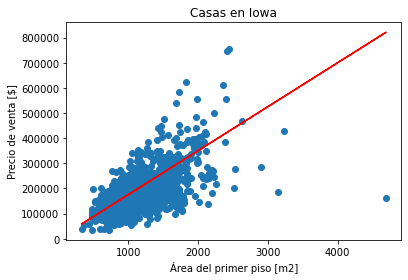

In [14]:
# Añadimos la unidad de sesgo x0=1
x_train_b =  np.insert(x_train, 0, 1, axis=1)
x_train_b = x_train_b.T

# Asignamos el vector de pesos w = [w0 w1]
w0 = 0 # intersección
w1 = 175
w = np.array([w0, w1], dtype='float64')
w = w.reshape((w.shape[0], 1))

preds = h(w, x_train_b)
print(preds.shape)

plt.figure()
plt.scatter(x_train, y_train, alpha = 1)
plt.plot(x_train, preds.T, color='r')
plt.title('Casas en Iowa')
plt.xlabel('Área del primer piso [m2]')
plt.ylabel('Precio de venta [$]')
plt.show()

### Creando la función de costo

Se establece la función de costo como el error cuadrático medio: 

$$cost(w) = \frac{1}{2m}\sum_{i=1}^{m}(h(x)^{(i)}-y^{(i)})^{2}=\frac{1}{2m}(w^{T}X-\vec{y})^{T}(w^{T}X-\vec{y})$$

In [18]:
# Función de costo
def cost(w, x, y):
    """
        params:
            w: [np_array] a vector of weights with dimensions (nx1), where n represents the number of weights.
            x: [np_array] a vector of feature variables with dimensions (nxm), 
                where n represents the number of feature variables and m the number of training examples
            y: [np_array] a vector of feature variables with dimensions (mx1), 
                where m represents the number of target variables
        returns:
            cost: [double] the mean squared error
    """
    return (1/(2*x.shape[1])) * (np.sum(np.square(h(w, x).T-y)))

### Graficando la función de costo


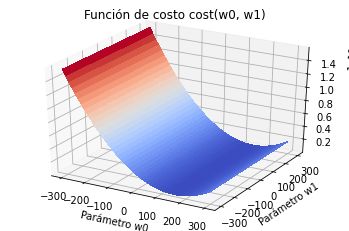

In [19]:
# Se crea un vector de pesos (pendientes de diferentes rectas) se define al sesgo como 0
num_data = 600

w0_v = np.arange(-num_data/2, num_data/2, dtype='float64')
w1_v = np.arange(-num_data/2, num_data/2, dtype='float64')

X, Y = np.meshgrid(w0_v, w1_v)

# Se inicializa un vector de errores
mse = np.zeros((num_data, num_data))

# Se itera en el vector de pesos
for i in range(num_data):
    for j in range(num_data):
        w = np.array([w0_v[i], w1_v[j]])
        w = w.reshape((w.shape[0], 1))
        mse[i, j] = cost(w, x_train_b, y_train)
    
# Se gráfica
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, mse, cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('Función de costo cost(w0, w1)')
plt.xlabel('Parámetro w0')
plt.ylabel('Parámetro w1')
plt.show()

### Calculando el gradiente de la función de costo
Recordando que el gradiente está dado por:

$$\bigtriangledown _{w}cost(w)= \frac{1}{m}(\vec{y}-h(x))\vec{x} $$

In [22]:
# Gradiente de la función de costo
def dJ(w, x, y):
    """
        params:
            w: [np_array] a vector of weights with dimensions (nx1), where n represents the number of weights.
            x: [np_array] a vector of feature variables with dimensions (nxm), 
                where n represents the number of feature variables and m the number of training examples
            y: [np_array] a vector of feature variables with dimensions (mx1), 
                where m represents the number of target variables
        returns:
            dJ: [double] the derivative of the mean squared error
    """
    e = h(w, x).T - y
    return (1 / (x.shape[1])) * np.dot(x, e)

Implementamos el descenso por gradiente

### Creando el algoritmo completo

In [23]:
def optimizar_LMS(x, y, num_iter, alpha, w = None):
    """
    We calculate gradient descent for minimizing the MSE to obtain the best linear hypothesis.
        params:
            x: [np_array] a vector of feature variables with dimensions (nxm), 
                where n represents the number of feature variables and m the number of training examples
            y: [np_array] a vector of feature variables with dimensions (mx1), 
                where m represents the number of target variables
            num_iter: [int] an integer indicating the number of iterations of the Gradient Descent algorithm
            alpha: [double] learning rate constant specifying the magnitude update step
            w: [np_array] vector that contains the initial weights to start optimzing the model with dimensions (n x 1)
                
        return:
            j: [np_array] a vector (num_iter x 1) containing all cost function evaluations during training
            w: [np_array] a vector of the final optimized weights with dimensions (nx1)
    """
    
    if w is None:
        # Inicializamos los pesos aleatoriamente
        w = np.random.randn(x.shape[0], 1)
    
    # se generan los vectores
    it = np.arange(0, num_iter)
    j = np.zeros(num_iter)
    
    # Se optimiza el modelo por el numero de iteraciones
    for i in range(num_iter):

        # Calculamos la hipótesis
        preds = h(w, x)

        # Actualizamos los pesos
        w = w - alpha * dJ(w, x, y)

        # Guardamos el costo
        j[i] = cost(w, x, y)

    return w, j

### Ejemplo con modelo simple

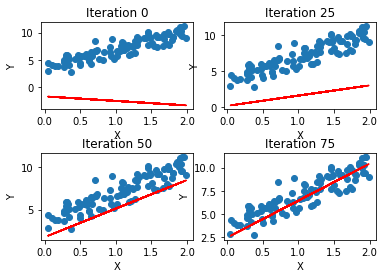

In [24]:
# Generamos datos aleatoriamente
X = 2*np.random.rand(100,1)
Y = 4 + 3*X + np.random.randn(100,1)

# Añadimos la unidad de sesgo
X_b =  np.insert(X, 0, 1, axis=1)
X_b = np.transpose(X_b)

# Inicializamos los pesos aleatoriamente (opcional)
w = np.random.randn(x.shape[0], 1)

# Parámetros de optimización
max_iter = 100
step_iter = 25
alpha = 0.01

num_i = int(round(np.sqrt(max_iter/step_iter)))
it = list(range(0, max_iter, step_iter))

fig, axs = plt.subplots(num_i, num_i)
fig.subplots_adjust(hspace=0.5)
counter = 0

# Número de iteraciones y tasa de aprendizaje del descenso
for i in range(num_i):
    for k in range(num_i):
                
        # Se corre el algoritmo
        w, j = optimizar_LMS(X_b, Y, it[counter], alpha, w)

        # Graficamos el costo
        axs[i, k].scatter(X, Y, alpha = 1)
        axs[i, k].set_title('Iteration {0}'.format(it[counter]))
        axs[i, k].set_xlabel('X')
        axs[i, k].set_ylabel('Y') 
        preds = h(w, X_b)
        axs[i, k].plot(X, preds.T, color='r')
        
        counter += 1

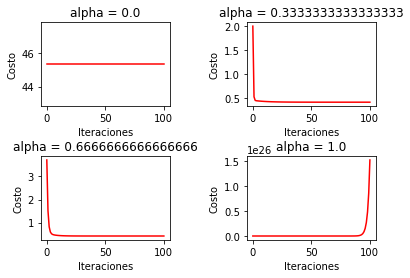

In [25]:
# Número de iteraciones y tasa de aprendizaje del descenso
num_alphas = 4

alphas = np.linspace(0, 1, num_alphas)
num_i = int(round(np.sqrt(num_alphas)))

fig, axs = plt.subplots(num_i, num_i)
fig.subplots_adjust(hspace=0.6, wspace=0.6)
counter = 0
it = np.linspace(0, max_iter, max_iter)

for i in range(num_i):
    for k in range(num_i):
    
        # Inicializamos los pesos aleatoriamente (opcional)
        w = np.random.randn(x.shape[0], 1)

        w, j = optimizar_LMS(X_b, Y, max_iter, alphas[counter], w)

        # Graficamos el costo
        axs[i, k].set_title('alpha = {0}'.format(alphas[counter]))
        axs[i, k].set_xlabel('Iteraciones')
        axs[i, k].set_ylabel('Costo') 
        axs[i, k].plot(it, j, color='r')
        
        counter += 1


### Ejemplo con modelo de casas

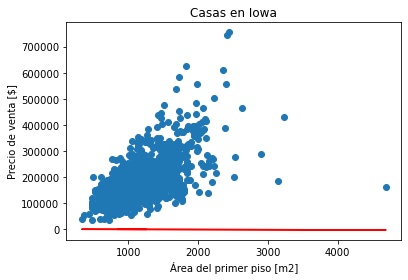

In [26]:
# Inicializamos los pesos aleatoriamente (opcional)
w = np.random.randn(x.shape[0], 1)

# Se gráfican los datos
plt.figure()
plt.scatter(x_train, y_train, alpha = 1)
plt.title('Casas en Iowa')
plt.xlabel('Área del primer piso [m2]')
plt.ylabel('Precio de venta [$]')
preds = h(w, x_train_b)
plt.plot(x_train, np.transpose(preds), color='r')

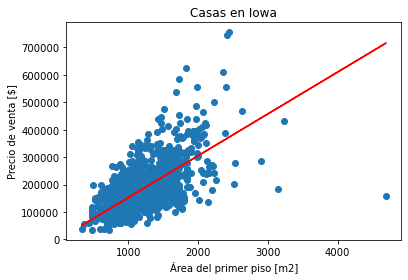

In [27]:
# Corremos la optimización
num_iter = 100
alpha = 0.000001
w, j = optimizar_LMS(x_train_b, y_train, num_iter, alpha, w)

# Se gráfican los datos
plt.figure()
plt.scatter(x_train, y_train, alpha = 1)
plt.title('Casas en Iowa')
plt.xlabel('Área del primer piso [m2]')
plt.ylabel('Precio de venta [$]')
preds = h(w, x_train_b)
plt.plot(x_train, np.transpose(preds), color='r')

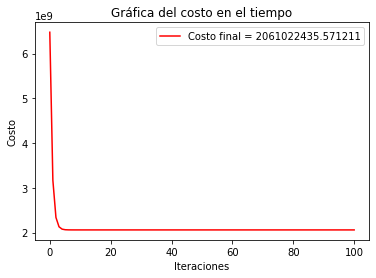

In [28]:
# Graficamos el costo
it = np.linspace(0, num_iter, 100)
plt.figure()
plt.title('Gráfica del costo en el tiempo')
plt.xlabel('Iteraciones')
plt.ylabel('Costo') 
plt.plot(it, j, color='r', label='Costo final = {0}'.format(j[-1]))
plt.legend()
plt.show()

## 3. Ecuaciones normales
Se sabe entonces que las ecuaciones normales están dadas por: 

$$\vec{w}=(X^{T}X)^{-1}X^{T}\vec{y}$$

In [ ]:
def fit_ne(x, y):
    """
        params:
            x: [np_array] a vector of feature variables with dimensions (mxn), 
                where n represents the number of feature variables and m the number of training examples
            y: [np_array] a vector of feature variables with dimensions (nx1), 
                where m represents the number of target variables
                
        return:
            w: [np_array] a vector of the final optimized weights with dimensions (nx1)
    """
    return np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y) 

# Ecuaciones normales
w = fit_ne(X_b.T, Y)

# Graficamos la línea ajustada por ecuaciones normales
plt.figure()
plt.scatter(X.T, Y, alpha = 1)
plt.title('Random Data')
plt.xlabel('X')
plt.ylabel('Y') 
preds = h(w, X_b)
plt.plot(X, np.transpose(preds), color='r')
plt.show()

### Retomando el ejemplo con modelo de casas

In [ ]:
w = fit_ne(x_train_b.T, y_train)

# Graficamos el costo
plt.figure()
plt.scatter(x_train, y_train, alpha = 1)
plt.title('Casas en Iowa')
plt.xlabel('Área del primer piso [m2]')
plt.ylabel('Precio de venta [$]')
preds = h(w, x_train_b)
plt.plot(x_train, np.transpose(preds), color='r')
plt.show()

## Ejemplo casas: 2D

In [ ]:
# Hacemos la matriz X
X_train = np.concatenate((x_train, x_train_2), axis=1)

# Añadimos la unidad de sesgo x0=1
X_train_b =  np.insert(X_train, 0, 1, axis=1)
X_train_b = X_train_b.T

# Optimizamos
w = fit_ne(X_train_b.T, y_train)
preds = h(w, X_train_b)
        
# Se gráfica
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_train, x_train_2, y_train)
ax.scatter(x_train, x_train_2, preds, s=50, c='r')
ax.set_xlabel('Price of 1st floor.')
ax.set_ylabel('Price of 2nd floor.')
ax.set_zlabel('Sales Price')